# Cinétique formelle 

#### But: Résoudre avec des moyens numérique la cinétique d'un système siège d'un mécanisme complexe.

### Exercice 1: Ressources pour la résolution d'une équation différentielle ordinaire

Commençons par un problème simple, nécessitant la résolution d'une **seule équation différentielle ordinaire** (EDO). 

On considère un système siège d'une **seule réaction** en sens direct $A \rightarrow B$, avec pour condition initiales $[A]_0=0.01 M$ et $[B]_0 = 0$ ($A$ seule espèce en solution à $t=0$). 

La réaction est d'ordre 1 par rapport au réactif $A$. Elle a pour constante $ k = 0.01 s^{-1}$.



1) Compléter ci-dessous l'équation différentielle traduisant la mise en équation du système en fonction de $[A]$.


Rédiger sur papier libre ou bien s'initier à la syntaxe des équations Latex pour écrire l'équation dans la cellule ci-dessous: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

$$r = -\frac{d[A]}{dt} = \textrm{à compléter}$$

2) Vous savez résoudre cette équation différentielle à la main, compte tenu des conditions initiales. 

Ecrire l'expression analytique de la fonction $[A](t)$ (sur papier libre ou bien ci-dessous).

$$[A](t)= ... \textrm{(à compléter)} $$

3) On peut également résoudre **numériquement** l'équation différentielle à l'aide des librairies de calcul numérique de python et présenter les résultats obtenus graphiquement. Pour cela, on importe d'abord les modules indispensables.

In [1]:
import numpy as np
import scipy as sp
import scipy.integrate as itg
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

Pour résoudre le problème tel celui de Cauchy:

$$\begin{align} 
y'(t) &=f(t,y(t)) \qquad t \in [t_0,t_0+T[ \\
y(t_0)&=y_0
\end{align}$$


On peut faire appel à la fonction `odeint` du module `scipy.integrate`

*Documentation:* https://docs.scipy.org/doc/scipy/tutorial/integrate.html

Text(0, 0.5, 'y')

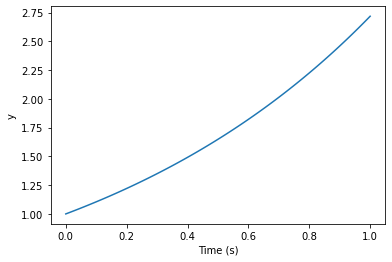

In [2]:
%matplotlib inline 
def func (y,t): #attention à respecter l'ordre des variables attendu par odeint
    dydt = y
    return dydt

y0 = 1.0
t = np.linspace(0,1,100) #retourne un array de valeur régulièrement espacées sur un intervalle
y = itg.odeint(func,y0,t) #résolution de l'équation y' = y avec la condition initiale y(t=0)=1 (ça doit donner la fonction exp)

plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('y')

Ecrire le code permettant un affichage de $[A](t)$ ci-dessous.

Text(0, 0.5, '[A] (M)')

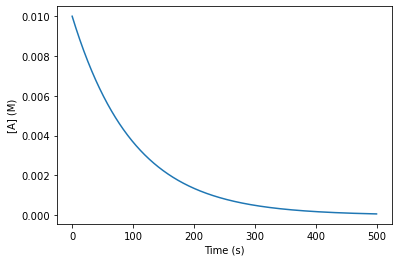

In [3]:
def func (y,t): 
    dydt = -k*y
    return dydt
k = 0.01 #constante de vitesse en s-1
y0 = 0.01 #concentration initiale en A
t = np.linspace(0,500,1000) #on observe l'évolution sur 200s puisque le temps de demi-réaction est ln2/k = 69 s
y = itg.odeint(func,y0,t) 

plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('[A] (M)')

5) On souhaite maintenant tracer $[A](t)$ et $[B](t)$. Deux possibilités.

- Exploiter la conservation de la matière: $[B] + [A] = [A]_0$ (à préférer si on travaille à la main sur papier !!)
- Résoudre le système d'équations différentielles suivant:
$$ \frac{d[A]}{dt} = - k [A] $$
$$ \frac{d[B]}{dt} =  k [A] $$

À vous de jouer... Vous pouvez faire varier la valeur de $k$ si vous souhaitez voir l'impact sur l'allure des courbes.

### Réponse

Text(0, 0.5, '[A],[B]')

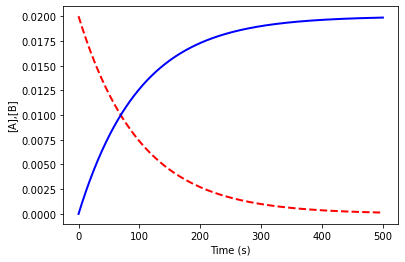

In [4]:
def syst(C,t): #entrée: liste de deux concentrations, k déjà défini plus haut
    A = C[0]
    B = C[1]
    
    dAdt = - k * A
    dBdt = k * A
    
    return [dAdt,dBdt] #sortie: liste des dérivées des deux concentrations

t = np.linspace(0,500,1000)
C0 = [0.02,0] # concntrations initiales
C = itg.odeint(syst,C0,t) 

plt.plot(t,C[:,0],'r--',linewidth=2.0)
plt.plot(t,C[:,1],'b-',linewidth=2.0)
plt.xlabel('Time (s)')
plt.ylabel('[A],[B]')

## Exercice 2: Réactions opposées

On considère ici un système siège d'un **équilibre**, correspondant aux réactions **opposées**:
$$ A \xrightarrow{k_1} B$$
$$ B \xrightarrow{k_{-1}} A$$

Ce qui peut également se compacter sous la forme plus usuelle:

$$ A \overset{k_1}{\underset{k_{-1}}{\rightleftarrows}} B $$

On supposera un cas où les **ordres partiels** sont égaux à $1$ par rapport à $A$ et à $B$. Les concentrations initiales sont notées $[A]_0$ et $[B]_0$.

1) Pour bien comprendre le lien entre vitesse du processus chimique et vitesse de chaque réaction, on rappelle qu'à chaque réaction en sens direct $i$, on peut associer un avancement chimique propre $x_i$. La vitesse de la réaction $i$ est alors définie par:

$$r_i = \frac{d x_i}{dt}$$

Ecrire ci-dessous l'expression des vitesses en sens direct $r_1$ et en sens inverse $r_{-1}$.

$$r_1 = ....  \qquad \textrm{et} \qquad r_{-1} = ... \textrm{(compléter)}$$

Par ailleurs, on peut définir un avancement global $x$ pour l'équilibre $ A \overset{k_1}{\underset{k_{-1}}{\rightleftarrows}} B $. Quelle est la relation entre $x$, $x_1$ et $x_{-1}$ ?

$$x = .... \textrm{(compléter)}$$

Or la **vitesse globale du processus chimique** est définie par:

$$r = \frac{d x}{dt} $$

En déduire la relation entre $r$, $r_{1}$ et $r_{-1}$:

$$r = ....   \textrm{(compléter)}$$


2) Ecrire le système d'équation différentielles traduisant l'évolution temporelle des concentrations, en fonction de $[A]$ et de $[B]$. 

Sur papier, dans l'hypothèse d'une résolution à la main, montrer que l'utilisation de la conservation de la matière permet de réduire ce système à une seule équation différentielle portant sur l'avancement volumique $x(t)$.

Résoudre sur papier (cf. cours) pour des conditions initiales telles que $[B]_0 = 0$ et donner l'expression littérale de $x(t)$, $[A](t)$ et de $[B](t)$.

3) Résoudre numériquement le système et tracer l'évolution de $[A](t)$ et de $[B](t)$ en faisant varier les valeurs de $[A]_0$ et de $[B]_0$ entre $0$ et $0.01 M$. On supposera $k_1 = 0.01 s^{-1}$ et on fera varier le rapport $\frac{k_1}{k_{-1}}$ entre $0.1$ et $10$.

### Réponse

Text(0, 0.5, '[A],[B]')

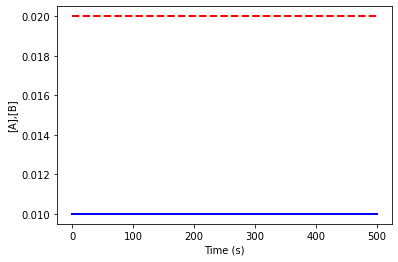

In [5]:
def syst(C,t): 
    A = C[0]
    B = C[1]
    
    dAdt = - tabk[0] * A + tabk[1] *B
    dBdt = tabk[0] * A - tabk[1] *B
    
    return [dAdt,dBdt]

tabk =[0.01,0.02] #k_1=tabk[0] et k_-1=tabk[1]
t = np.linspace(0,500,1000)
C0 = [0.02,0.01] # concntrations initiales
C = itg.odeint(syst,C0,t) 

plt.plot(t,C[:,0],'r--',linewidth=2.0)
plt.plot(t,C[:,1],'b-',linewidth=2.0)
plt.xlabel('Time (s)')
plt.ylabel('[A],[B]')

4) Dans le cadre de réactions opposées d'ordre 1, vérifier la relation entre constante d'équilibre et constantes de vitesse:

$$K = \frac{k_1}{k_{-1}}$$

5) On suppose maintenant un système tel que:
$$ A + B \overset{k_1}{\underset{k_{-1}}{\rightleftarrows}} C + D $$
avec des **ordres partiels 1** par rapport aux réactifs.

Simuler l'évolution du système pour différents jeux de paramètres. Les concentrations initiales varient entre $0.$ et $0.01 M$. Les valeurs des constantes varient entre $0.1$ et $0.01 L.mol^{-1}.s^{-1}$.

Peut-on trouver dans ce cas une relation entre la constante de l'équilibre $K$ et et les constantes cinétiques ?

### Réponse: 


Text(0, 0.5, 'Concentrations')

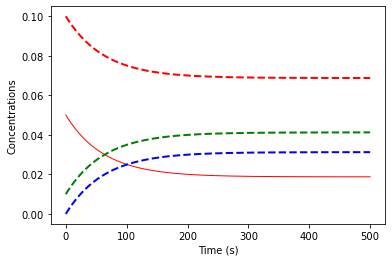

In [6]:
def syst(C,t): 
    dAdt = - tabk[0] * C[0] * C[1] + tabk[1] * C[2] * C[3]
    dBdt = - tabk[0] * C[0] * C[1] + tabk[1] * C[2] * C[3]
    dCdt = tabk[0] * C[0] * C[1] - tabk[1] * C[2] * C[3]
    dDdt = tabk[0] * C[0] * C[1] - tabk[1] * C[2] * C[3]
    
    return [dAdt,dBdt,dCdt,dDdt]

tabk =[0.1,0.1] #k_1=tabk[0] et k_-1=tabk[1]
t = np.linspace(0,500,1000)
C0 = [0.1,0.05,0.,0.01] #concentrations initiales A = C[0], B = C[1], C = C[2], D = C[3] 
C = itg.odeint(syst,C0,t) 

#print(C)
plt.plot(t,C[:,0],'r--',linewidth=2.0)
plt.plot(t,C[:,1],'r-',linewidth=1.0)
plt.plot(t,C[:,2],'b--',linewidth=2.0)
plt.plot(t,C[:,3],'g--',linewidth=2.0)
plt.xlabel('Time (s)')
plt.ylabel('Concentrations')

## Exercice 3: Réactions successives et approximation de l'état quasi-stationnaire

On considère maintenant un système siège de deux réactions **sucessives**:
$$ A \xrightarrow{k_1} B $$
$$ B \xrightarrow{k_{2}} C$$

c'est-à-dire:

$$ A \xrightarrow{k_1} B \xrightarrow{k_{2}} C $$

On supposera un cas où les **ordres partiels** sont égaux à $1$ par rapport à $A$ et à $B$. Les concentrations initiales sont notées $[A]_0 \neq 0$ et $[B]_0 = [C]_0 = 0$.

1) Représenter les variations de $[A]$, $[B]$ et $[C]$ pour différentes valeurs du rapport $k_2/k_1$. On peut partir de conditions initiales dans lesquelles $[A]_0 = 0.01 M$ et $[B]_0 = [C]_0 = 0$. Prendre pour commencer $k_1 = k_2 =0.01 s^{-1}$.

Text(0, 0.5, 'Concentrations')

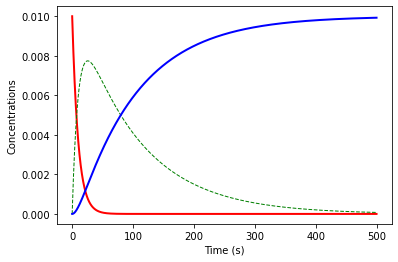

In [7]:
import numpy as np
import scipy as sp
import scipy.integrate as itg
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)

k = [0.1,0.01] #valeurs des constantes k1 et k2
C0 = [0.01,0.0,0.0] #concentrations initiales

def syst(C,t):
    dAdt = - k[0] * C[0]
    dBdt = k[0] * C[0] - k[1] * C[1]
    dCdt = k[1] * C[1]
    return [dAdt,dBdt,dCdt]

t = np.linspace(0,500,1000)
C = itg.odeint(syst,C0,t)

plt.plot(t,C[:,0],'r-',linewidth=2.0)
plt.plot(t,C[:,1],'g--',linewidth=1.0)
plt.plot(t,C[:,2],'b-',linewidth=2.0)
plt.xlabel('Time (s)')
plt.ylabel('Concentrations')

2) Tester maintenant des valeurs telles que $k_2/k_1 \simeq 100$ ou $k_2/k_1 \simeq 0,01$. Qu'observe t-on?

3) En résolvant à la main les équations différentielles (ce que vous devez également savoir faire!), on obtient:

$$[A](t) = [A]_0 \exp{(-k_1\, t)}$$
$$[B](t) = \frac{k_1 }{k_2 - k_1}\, [A]_0\, \left( \exp{(-k_1\, t)} - \exp{(-k_2\, t)} \right) $$
$$[C](t) = [A]_0 \left(1+ \frac{k_1\, \exp{(-k_2\, t)} - k_2\, \exp{(-k_1\, t)} }{k_2 - k_1} \right)$$

En négligeant certains termes devant d'autres dans le cas où $k_2/k_1 \gg 1$, montrer que dans ce cas:
$$[C](t) \simeq [A]_0 - [A](t) = [A]_0 \left( 1-\exp{(-k_1\, t)}\right) $$

#### Approximation de l'état quasi-stationnaire :

L'**AEQS** pose l'hypothèse que, très rapidement après le début d'une réaction, la concentration des espèces intermédiaires réactionnelles (espèces instables), qui sont consommées bien plus vite qu'elle ne sont produites sont telles que
- leur concentration dans le milieu est très faible (ici $[B]\simeq 0$ si $k_2/k_1\gg 1$)
- leur concentration varie peu au cours du déroulement de la réaction:
$$ \frac{d[B]}{dt}\simeq 0$$

## Exercice 4: Réactions concurrentes, notion de sélectivité

On considère maintenant un système siège des deux réactions suivantes:
$$ A + B \xrightarrow{k_1} C $$
$$ B + C \xrightarrow{k_2} D$$


On supposera un cas où les **ordres partiels** sont égaux à $1$ par rapport à toutes les espèces. 

Les concentrations initiales sont notées $[A]_0 = [B]_0 = 0.01 M$ et $[C]_0 = [D]_0 = 0$. On choisira $k_1 = 0.01 L.mol^{-1}.s^{-1}$ et $k_2 = 0.015 L.mol^{-1}.s^{-1}$.

Représenter les variations temporelles de concentrations ainsi que la sélectivité, définie comme:
$$ S = \frac{C}{C+D}$$

### Réponses

## Exercice 5: Systèmes oscillants

### Partie A. Le modèle de Lotka-Volterra et les réactions chimiques oscillantes

Nous nous intéressons ici à un modèle d'interaction **proies-prédateurs**, proposé par Volterra après la première guerre mondiale. Il s'agissait alors d'expliciter la dynamique des populations de sardines et de requins en mer Adriatique ; expliquer notamment pourquoi les quantités de sardines pêchées après l'interruption due à la guerre n'étaient plus aussi importantes que précédemment et pourquoi à la reprise de la pêche la proportion observée de requins avait augmenté.

Le modèle prend en compte deux types d'espèces, les poissons pêchés à valeur commerciale, les sardines ($N$) et leurs prédateurs, les requins ($P$). On considère que les sardines suivent intrinsèquement une dynamique de croissance malthusienne (nombre de naissances proportionnel à la population, ce qui donnerait en l'absence d'autres contraintes une croissance exponentielle de la population), alors que les requins, du fait de la concurrence entre les individus, ont eux tendance à suivre une dynamique de décroissance exponentielle (taux de mortalité supérieur au taux de natalité). 
Quant aux interactions entre les deux espèces, on les considère néfastes pour les sardines, et profitables aux requins... Ceci nous mène à modéliser l'évolution de nos deux populations par le système différentiel suivant:

$$ N(0)=N_0\qquad  P(0)=P_0$$
$$\frac{dN}{dt} = a\, N - b\, N\, P $$
$$\frac{dP}{dt} = -c\, P + d\, N\, P $$

D'après http://culturemath.ens.fr/maths/html/lotka/lotka.html

On s'intéressera aux valeurs de paramètres suivants: $a = 1.$, $b = 0.1$, $c = 1.5$ et $d = 0.75$. Conditions initiales $N_0 = 10$ et $P_0 = 5$ 


1) Avant de résoudre le système d'équations, on s'intéresse au(x) point(s) d'équilibre possibles pour ce système biologique, lorsque les évolutions temporelles observées sont nulles.

Indiquer les **deux solutions possibles** pourque la population soit en équilibre.

### Réponse

Soit les deux espèces s'éteignent et ${N(t) = 0,P(t)=0}$ ou bien $N(t) = \frac{c}{d} \qquad P(t)=\frac{a}{b} $ 

2) Dynamique du système

Résoudre le système avec les valeurs de paramètres données. Représenter graphiquement $N(t)$ et $P(t)$, puis $N$ en fonction de $P$.

Que dire de l'évolution de $N(t)$ et $P(t)$ ?

### Réponse

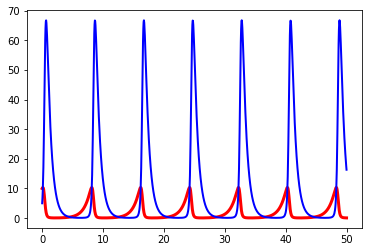

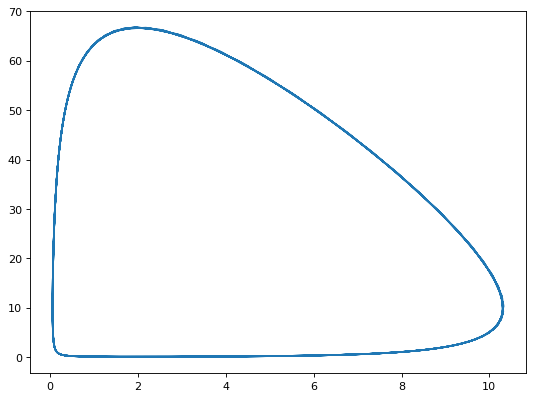

In [8]:
import numpy as np
import scipy as sp
import scipy.integrate as itg
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import *
%matplotlib inline 

#paramètres biologiques et populations initales
param = [1.,0.1,1.5,0.75]
C0 = [10,5]

def dCdt(C,t): 
    dNdt = param[0] * C[0] - param[1] * C[0] * C[1] 
    dPdt = - param[2] * C[1] + param[3] * C[0] * C[1]
    return [dNdt,dPdt]

#resolution avec ODEint
t = np.linspace(0,50,1000) # définition valeurs de t
C = itg.odeint(dCdt,C0,t)

#affichage
fig1 = plt.figure()
plt.plot(t,C[:,0],'r',lw=3)
plt.plot(t,C[:,1],'b',lw=2)
plt.show()
fig2 = plt.figure(figsize=(8,6), dpi=80)
plt.plot(C[:,0],C[:,1])
plt.show()

3) Stabilité des solutions

Essayer maintenant de tester diverses valeurs des populations initiales, en supposant les paramètres biologiques (prédation, mort naturelle, reproduction, etc...) inchangés. 

L'évolution du système est-elle toujours périodique ?

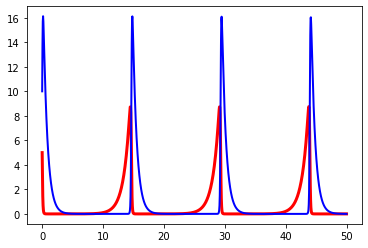

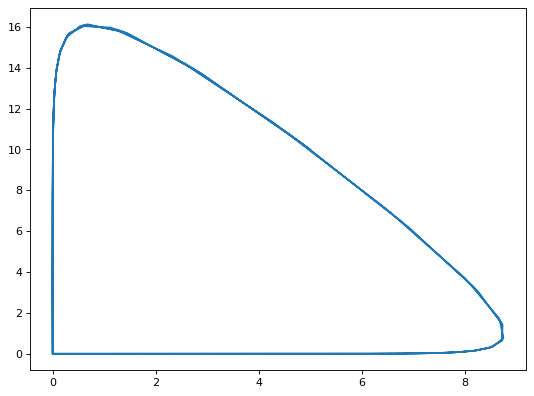

In [9]:
import numpy as np
import scipy as sp
import scipy.integrate as itg
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import *
%matplotlib inline 

#paramètres biologiques et populations initales
param = [1.,1,1.5,2]
C0 = [5,10]

def dCdt(C,t): 
    dNdt = param[0] * C[0] - param[1] * C[0] * C[1] 
    dPdt = - param[2] * C[1] + param[3] * C[0] * C[1]
    return [dNdt,dPdt]

#resolution avec ODEint
t = np.linspace(0,50,1000) # définition valeurs de t
C = itg.odeint(dCdt,C0,t)

#affichage
fig1 = plt.figure()
plt.plot(t,C[:,0],'r',lw=3)
plt.plot(t,C[:,1],'b',lw=2)
plt.show()
fig2 = plt.figure(figsize=(8,6), dpi=80)
plt.plot(C[:,0],C[:,1])
plt.show()

### Partie B.  Application aux réactions chimiques oscillantes

Le but de cette est de travailler autour de l’une des modèlisations possible de la **réaction chimique oscillante de Belouzov-Zhabotinsky** (notée BZ ci-après), qui a été présentée en cours. Une vidéo est proposée ci-dessous: en un point de la boite de pétri, on a alternance de rouge et de bleu.


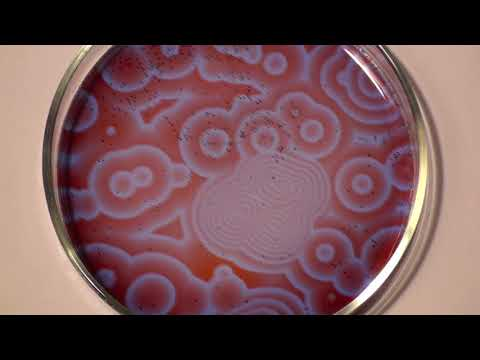

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('jRQAndvF4sM') 

Le bilan de la réaction BZ est l'oxydation de l'**acide malonique** par les **ions bromate** ${BrO_3}^-$:

$$ 3\ HOOCCH_2COOH + 4\ {BrO_3}^- \rightarrow 4\ Br^- + 9\ CO_2 + 6\ H_2 O $$

**Initialement**, on introduit les réactifs suivants : ions bromure $Br^-$, ions bromate ${BrO_3}^-$, ions cerium(IV) $Ce^{4+}$ et acide malonique, avec des concentrations très précises.

#### Mécanisme
Le mécanisme complet de la réaction BZ a été établi par Field, Körös et Noyes dans les années 70. Ce mécanisme, dit « FKN », comporte **18 réactions impliquant 21 espèces chimiques différentes**!!!!
On peut en donner néanmoins une représentation simplifiée en rassemblant certaines étapes. Les principales étapes sont :

* **Etape d'initiation**:
$$(1) \qquad Br^- + {BrO_3}^- + 2\ H^+ \rightarrow \mathbf{{HBrO}_2} + HOBr$$
$$(2) \qquad Br^- + HOBr + H^+ \rightarrow \mathbf{Br_2} + H_2O$$


* **Etape de production "auto-catalytique"** de $\mathbf{{HBrO}_2} $:
$$(3) \qquad  {BrO_3}^- + \mathbf{{HBrO}_2}+  H^+ \rightarrow 2\ \mathbf{{BrO}_2^\circ} + H_2O$$
$$(4) \qquad \mathbf{{BrO}_2^\circ} + Ce^{3+} + H^+ \rightarrow Ce^{4+} + \mathbf{{HBrO}_2} $$

En faisant la somme $(3)+2(4)$, le caractère **auto-catalytique** de production de $\mathbf{{HBrO}_2}$ apparaît mieux:
$$(3)+2(4) \qquad {BrO_3}^- + \mathbf{{HBrO}_2}+ 3\ H^+ + 2\ Ce^{3+} \rightarrow 2\ Ce^{4+} +  \mathbf{2\ {HBrO}_2} + H_2O $$

Cette réaction peut être qualifiée d'auto-catalytique. En effet, l'acide bromique HBrO2 catalyse sa propre formation. La vitesse de la réaction est alors proportionnelle à la concentration en HBrO2. On est en présence d'un phénomène activateur, cette vitesse augmentant avec la concentration en acide bromique.

* **Consommation de** ${HBrO}_2$: 
$$(5) \qquad Br^- + \mathbf{{HBrO}_2} + H^+ \rightarrow 2\ HOBr $$
$$(6) \qquad \mathbf{2\ {HBrO}_2} \rightarrow HOBr + {BrO_3}^- + H^+$$

Ces deux réactions **inhibent** la production de ${HBrO}_2$. On a donc présence de phénomènes **activateurs et inhibiteurs**, ce qui explique qualitativement la  possibilité d'oscillations de la composition du système.

* **Oxydation du substrat, l'acide malonique en alcool**: 
$$(7) \qquad \mathbf{Br_2} + HOOC-CH_2-COOH \rightarrow HOOC-CHBr-COOH + Br^- + H^+ $$
$$(8) \qquad 2\  Ce^{4+} + 2\ HOOC-CHBr-COOH + HOOC-CH_2-COOH + 3\ H_2O \rightarrow 2\ Br^- + 2\ Ce^{3+} + 3\ HOOC-CHOH-COOH$$

La réaction est suivie visuellement en ajoutant un indicateur rédox du potentiel, qui est imposé par le couple $Ce^{4+}/Ce^{3+}$. Cet indicateur est l'**orthophénantroline ferreuse**, dont la couleur dépend du no du fer du complexe et change de bleu au rouge.

#### Modélisation simplifiée: modèle FKN

On simplifie le mécanisme comme indiqué ci-dessous. On supposera que les **ordres partiels sont égaux aux coefficients stoechiométriques**.

\begin{align} 
(1) & \qquad A+Y  \rightarrow X & \qquad k_1 \\
(2) & \qquad X+Y  \rightarrow P & \qquad k_2 \\
(3) & \qquad A+X  \rightarrow 2\, X + Z & \qquad k_3 \\
(4) & \qquad 2\ X  \rightarrow A+P & \qquad k_4 \\
(5) & \qquad Z+B  \rightarrow Y & \qquad k_5 \\
\end{align}

avec les notations 
\begin{align} 
A & = {BrO_3}^- \\
X & = {HBrO}_2 \\
Y & = Br^- \\
Z & = Ce^{4+} \\
\end{align}


1) Ecrire les équations différentielles régissant la concentration des intermédiaires réactionnels $X$,$Y$ et $Z$.

2) Résoudre numériquement ce système d'équations différentielles, avec les paramètres suivants:

* $[A]=[B]=1\ M$ (supposées constantes par soucis de simplification, ce qui restreint la solution aux temps cours)

* Conditions initiales: $[X]_0 = 0.25\ M$; $[Y]_0 = 2.10\ M$; $[Z]_0= 0.83\ M$

* Pour t en secondes et la concentration en mol/L: $k_1 = 0,05$; $k_2 = 0,8$; $k_3 = 1,6$; $k_4 = 0,2$; $k_5 = 0,4$ (unités à préciser par vos soins)

3) Vous pouvez essayer de faire varier doucement les valeurs de $k_5$. Qu'observe-t-on?

4) Représenter les variations de $X$, $Y$ et $Z$ dans un diagramme 3D. Réaliser une animation de la courbe en fonction du temps.

5) Recommencer en considérant $[A]$ et $[B]$ vairables

#### Réponses

1) Equations différentielles: 

\begin{align} 
(a) & \qquad \frac{d[X]}{dt} = k_1 [A][Y] - k_2 [X][Y] + k_3 [A][X] -2\ k_4 [X]^2\\
(b) & \qquad \frac{d[Y]}{dt} = -k_1 [A][Y] - k_2 [X][Y] + k_5 [Z][B] \\
(c) & \qquad \frac{d[Z]}{dt} = k_3 [A][X] - k_5 [Z][B]\\ \\
\end{align}

Ce système peut se mettre éventuellement sous forme matricielle, qui seront traduites en tableaux (numpy.array) lors du codage.

$$ \begin{pmatrix} 
\frac{d[X]}{dt} \\
\frac{d[Y]}{dt} \\
\frac{d[Z]}{dt} \\
\end{pmatrix}
=
\begin{pmatrix} 
k_3 [A] -2\ k_4 [X]  &  k_1[A]-k_2[X]  & 0 \\
0 & -k_1[A]-k_2[X] & k_5[B] \\
k_3 [A] & 0 & -k_5 [B] \\
\end{pmatrix}
\begin{pmatrix} 
X \\
Y \\
Z \\
\end{pmatrix}
$$

On notant $T$ le vecteur $(X,Y,Z)$ et $M$ la matrice, on obtient le système:

\begin{align} T'(t) & = M(t).T(t) \qquad 0\leq t \leq T \\
T(0) & = T_0 
\end{align}



2)

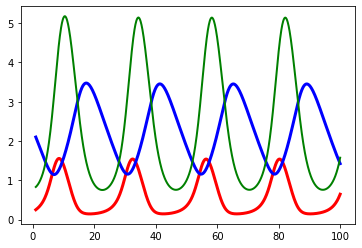

In [11]:
import numpy as np
import scipy as sp
import scipy.integrate as itg
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import *
%matplotlib inline 
#pour affichage dans le notebook

k=[0,0.05,0.8,1.6,0.2,0.4] #liste à 6 éléments, comme cela k[1]=k_1, puisque la numéroation de la liste part de zéro

#initialisation d'un array à 3 éléments
T = np.zeros(3)
T0 = np.array([0.25,2.10,0.83])
A0 = 1
B0 = 1


#T' = M.T avec un argument un vecteur de dimension 3
def F(T,t):
    derT = np.dot([[k[3]*A0-2*k[4]*T[0],k[1]*A0-k[2]*T[0],0],[0,-k[1]*A0-k[2]*T[0],k[5]*B0],[k[3]*A0,0,-k[5]*B0]],T)
    return derT

t = np.linspace(1,100,1000)

T = itg.odeint(F,T0,t) 

#tracés
fig1 = plt.figure()
plt.plot(t,T[:,0],'r',lw=3)
plt.plot(t,T[:,1],'b',lw=3)
plt.plot(t,T[:,2],'g',lw=2)

#portrait de phase en 3D
